# Выбор локации для скважины

## Цель проекта

Основываясь на предоставленных данных о пробах нефти в трёх регионах
* Построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.
* Проанализировать возможную прибыль и риски техникой *Bootstrap.*

Дополнительные условия задачи:

* Для обучения модели подойдет только линейная регрессия.
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* Доход с каждой единицы продукта составляет 450 тыс. рублей (бъём указан в тысячах баррелей)
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбрать регион с наибольшей средней прибылью.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## План выполнения:

* [Обзор данных](#обзор-данных)
* [Подготовка данных по каждому региону](#подготовка-данных)
* [Разделение выборки на 2 части в соотношении 75 / 25](#деление-на-выборки)
* [Обучение и проверка моделей. Метрика - RMSE](#обучение-и-проверка-модели)
* [Подготовка к расчёту прибыли](#подготовка-к-расчёту-прибыли)
* [Оценка прибыли и рисков для лучших 200. Метод bootstrap](#расчёт-прибыли-и-рисков)
* [Выводы. Выбор наилучшего региона](#выводы)

Описание данных

* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy import stats as st
import sweetviz as sv
import seaborn as sns


### Обзор данных

In [2]:
data_0 = pd.read_csv('C:\\Users\\Freo\\Desktop\\projects\\datasets\\p7\\geo_data_0.csv')
data_1 = pd.read_csv('C:\\Users\\Freo\\Desktop\\projects\\datasets\\p7\\geo_data_1.csv')
data_2 = pd.read_csv('C:\\Users\\Freo\\Desktop\\projects\\datasets\\p7\\geo_data_2.csv')


In [3]:
DATASETS = ['data_0', 'data_1', 'data_2']
regions = [data_0, data_1, data_2]

In [4]:
for region in regions:
    print(region.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

In [5]:
data_0.head()

id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

### Подготовка данных

In [6]:
for region in regions:
    print(region.corr(numeric_only = True))

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


                                             |          | [  0%]   00:00 -> (? left)


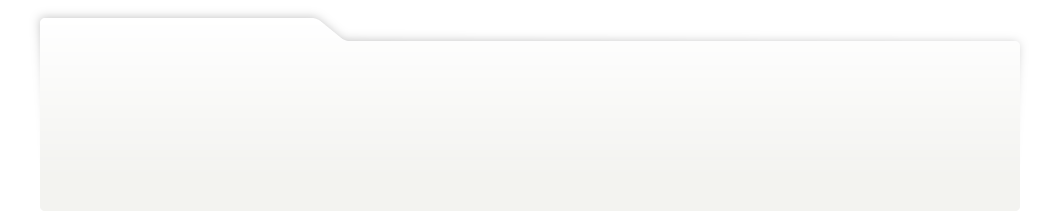
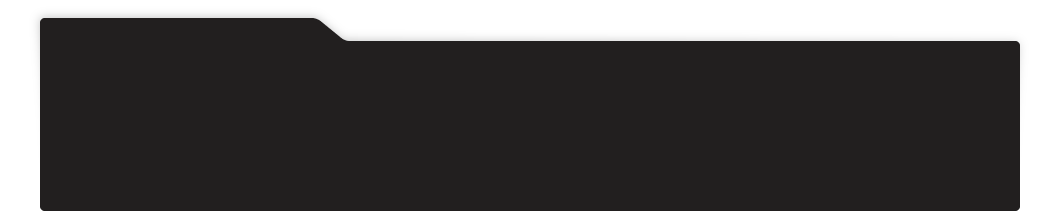
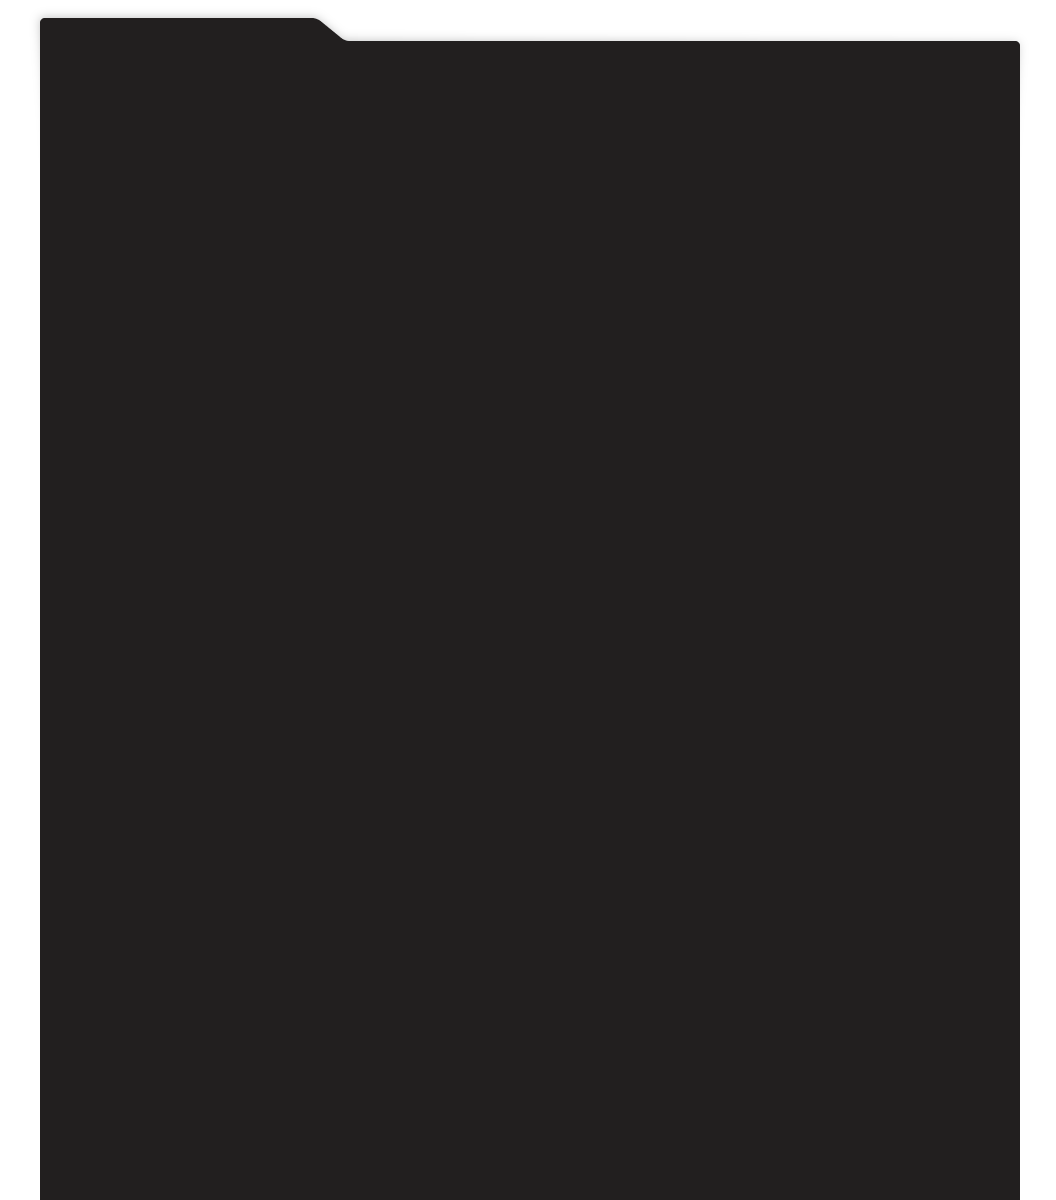
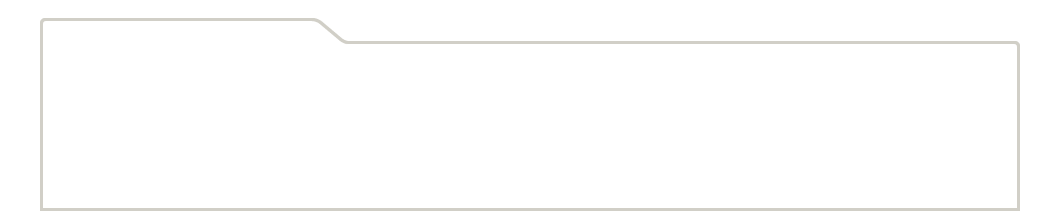
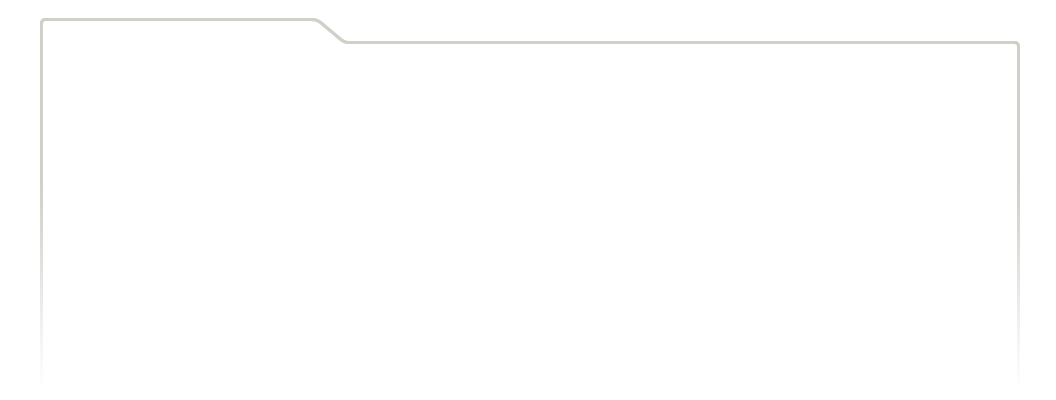
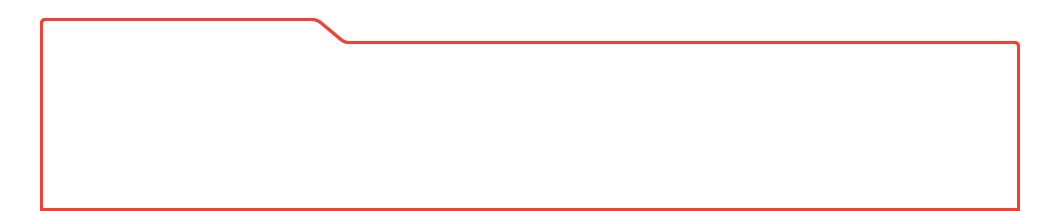
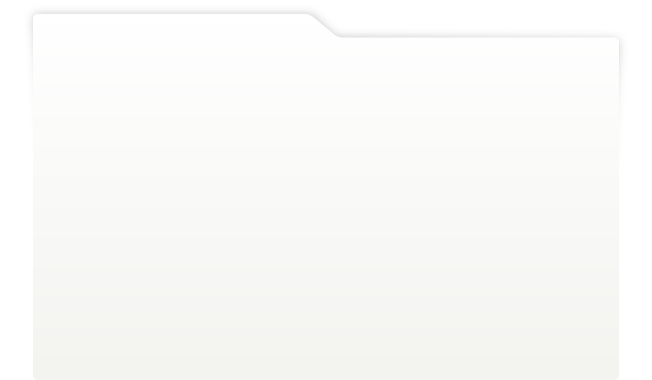
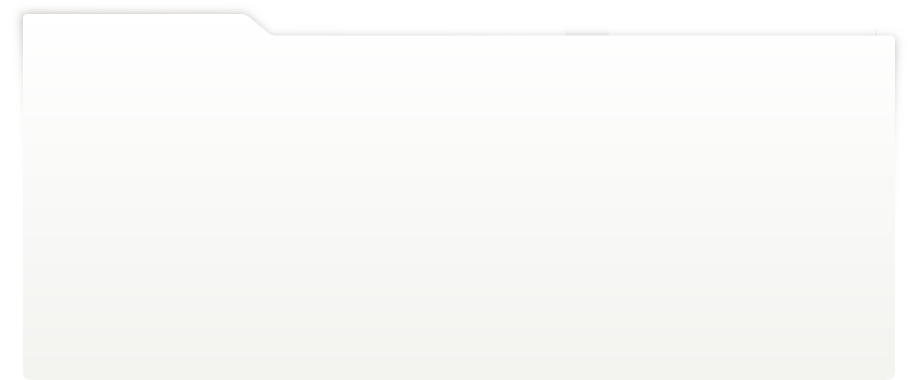
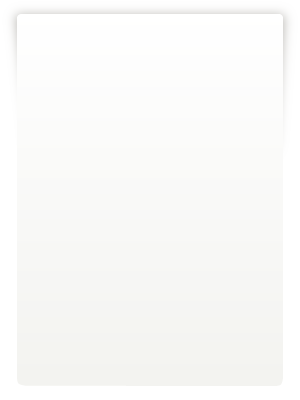
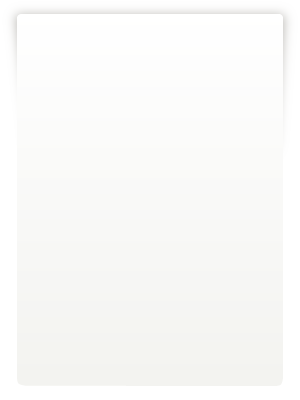
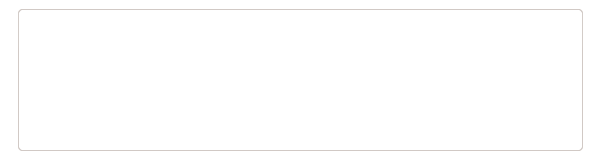
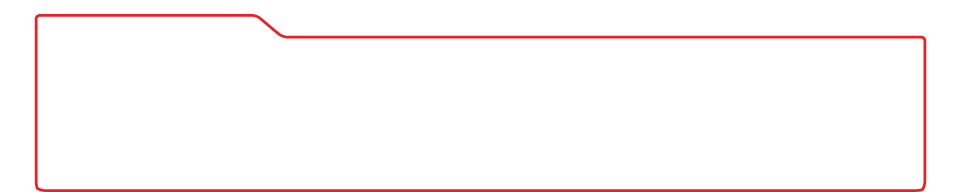
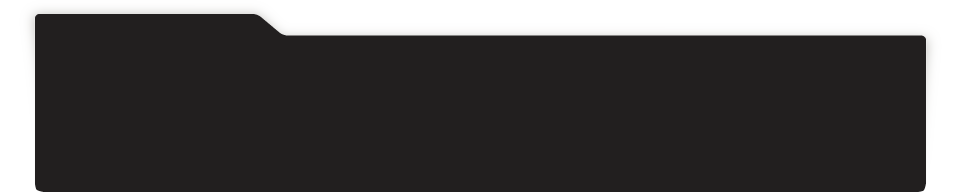
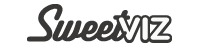
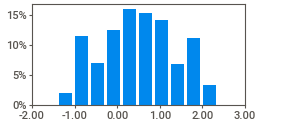
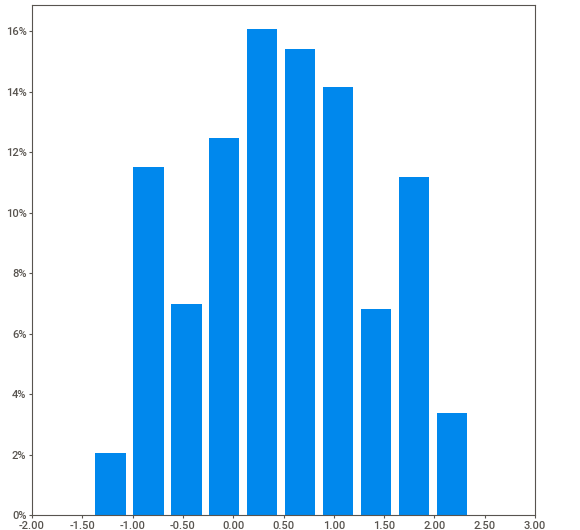
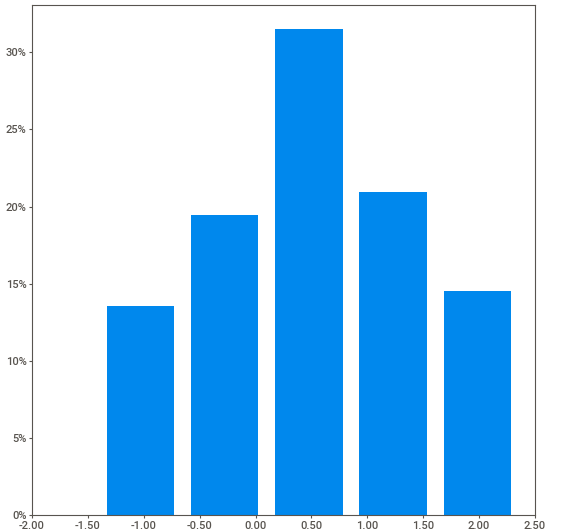
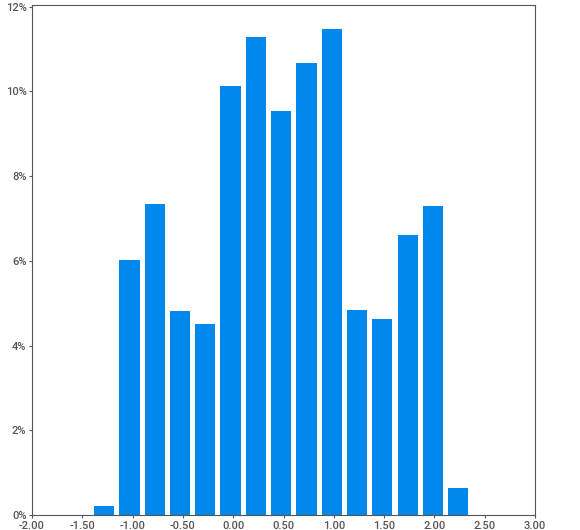
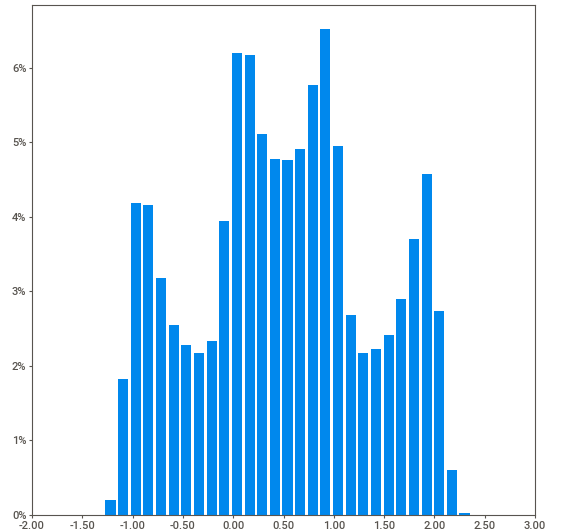
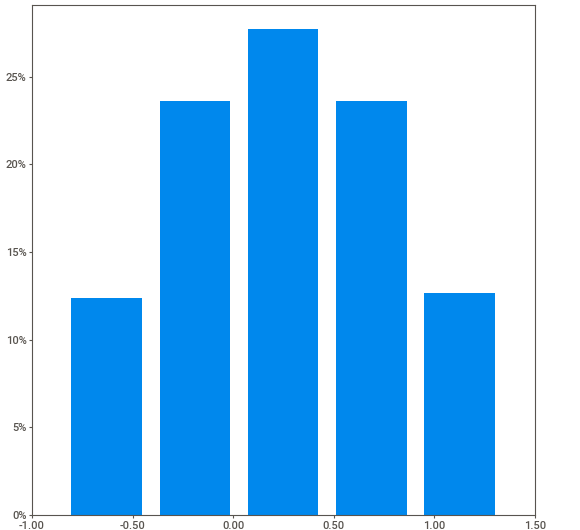
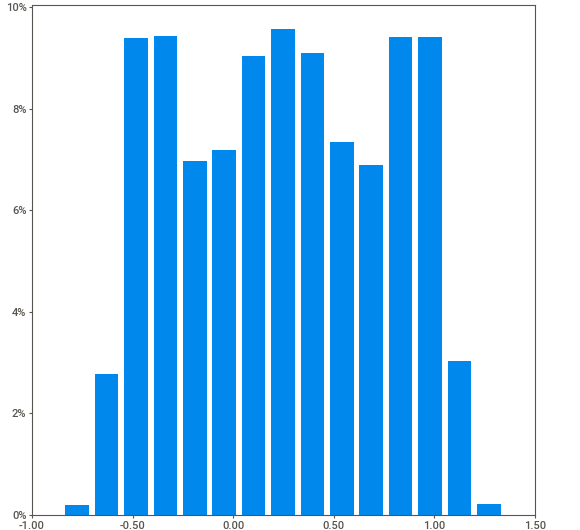
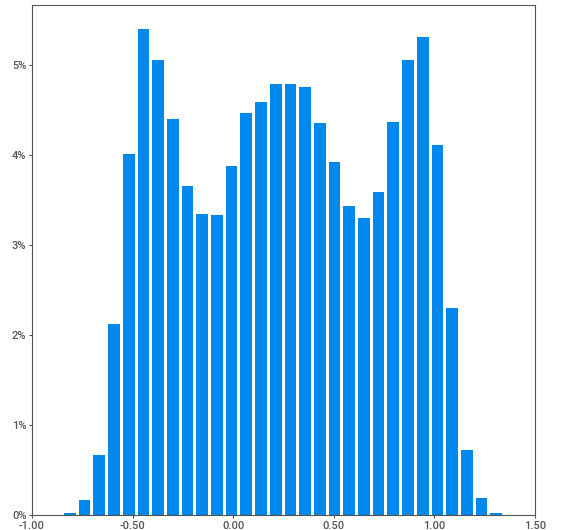
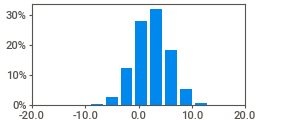
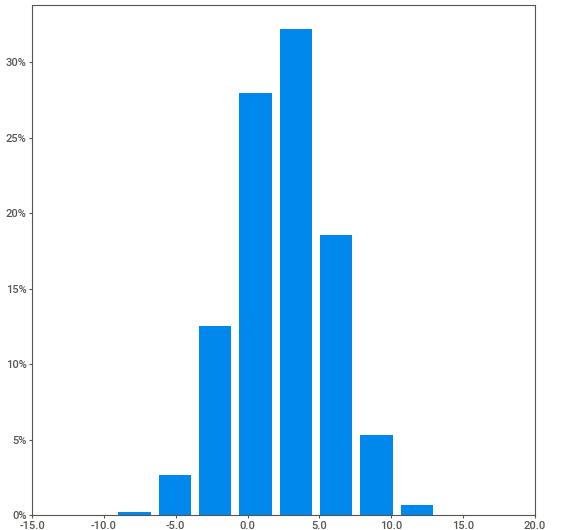
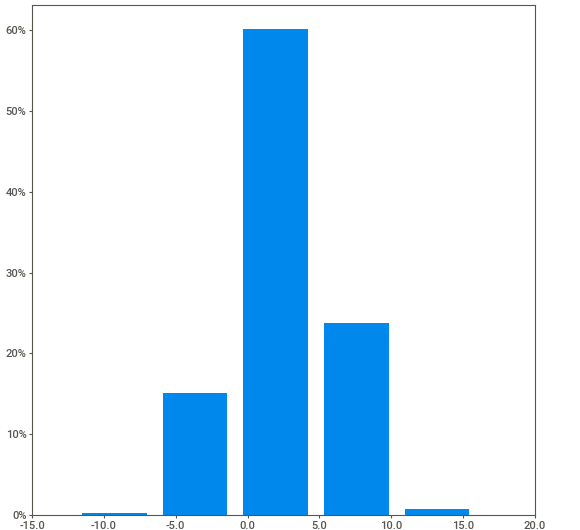
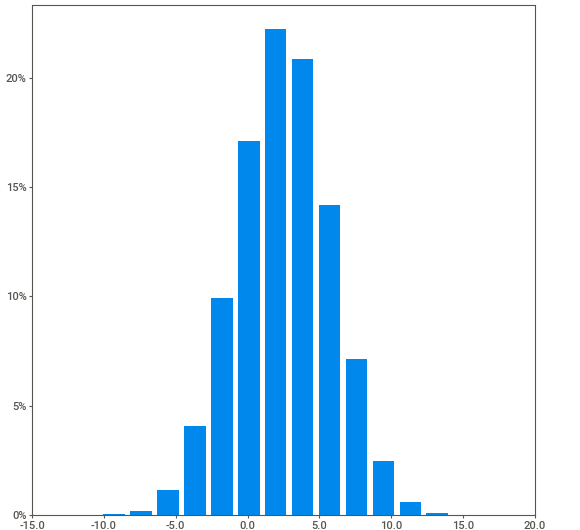
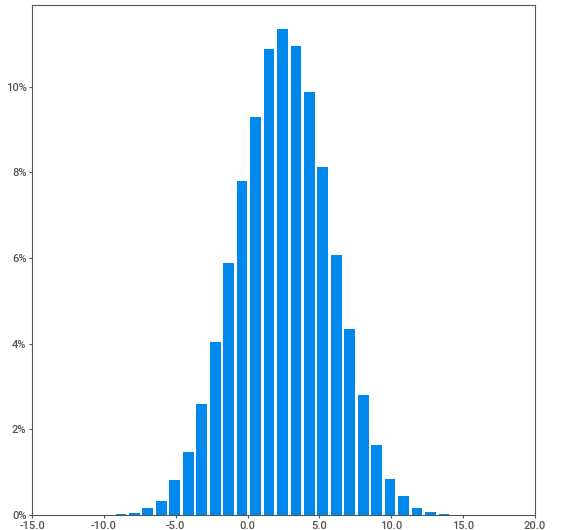
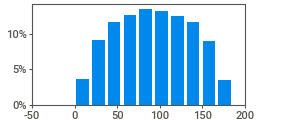
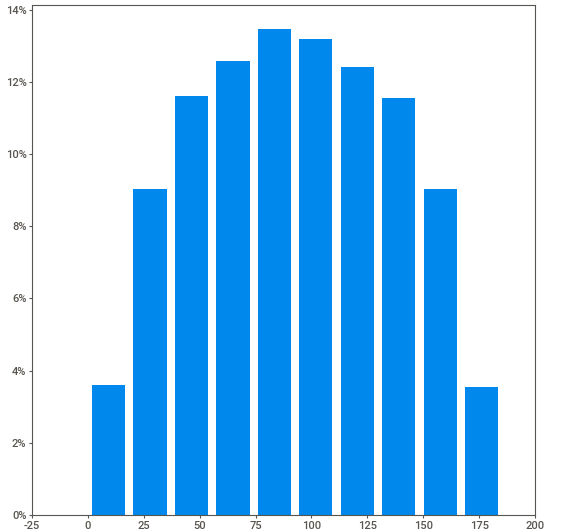
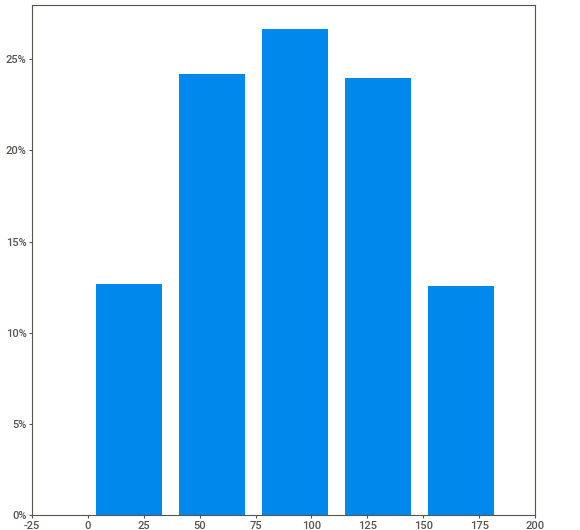
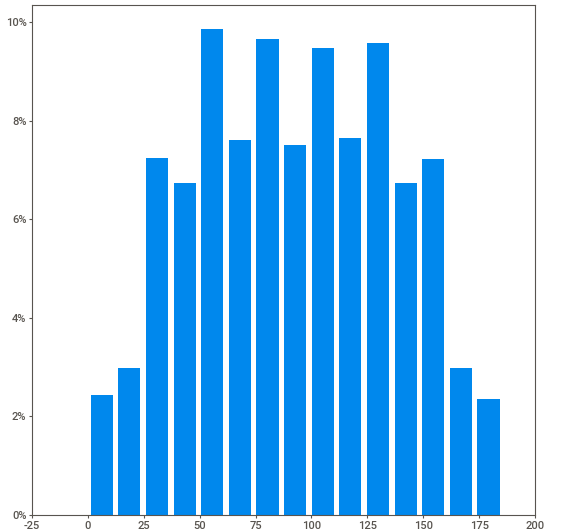
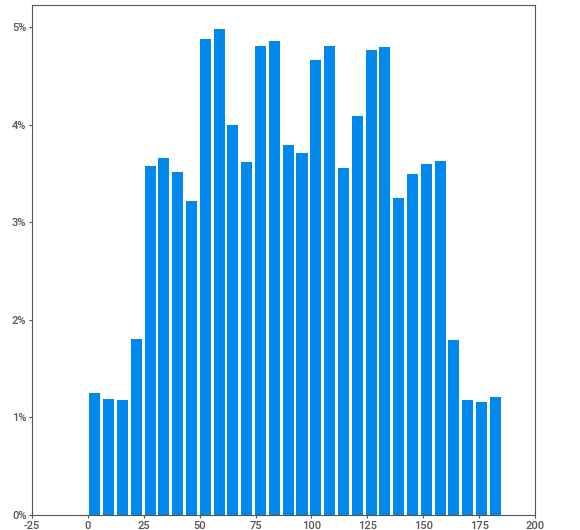
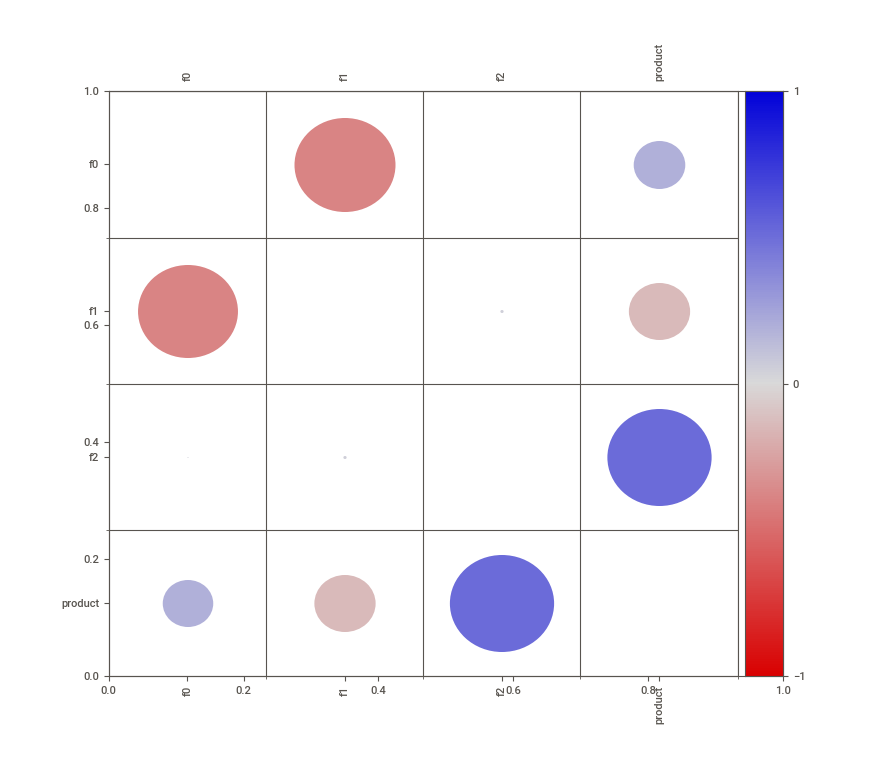
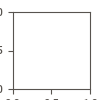

In [7]:
report0 = sv.analyze([data_0, "summary"])
report0.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


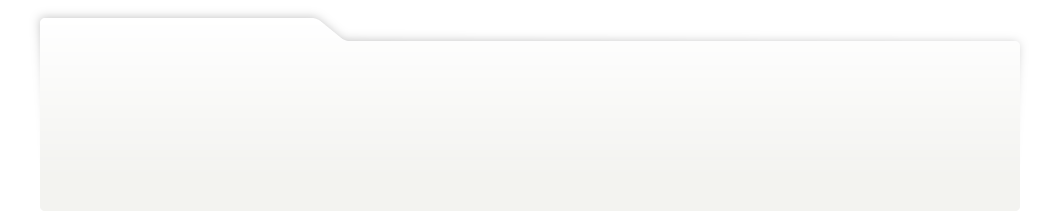
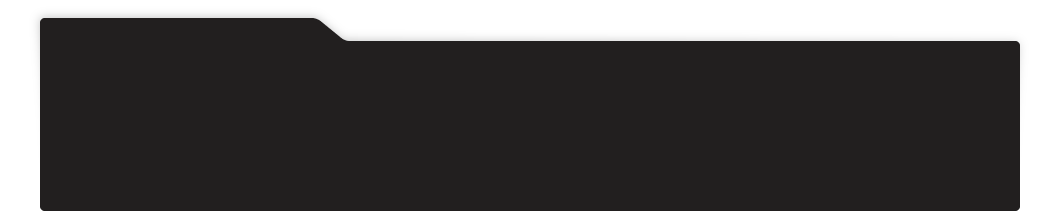
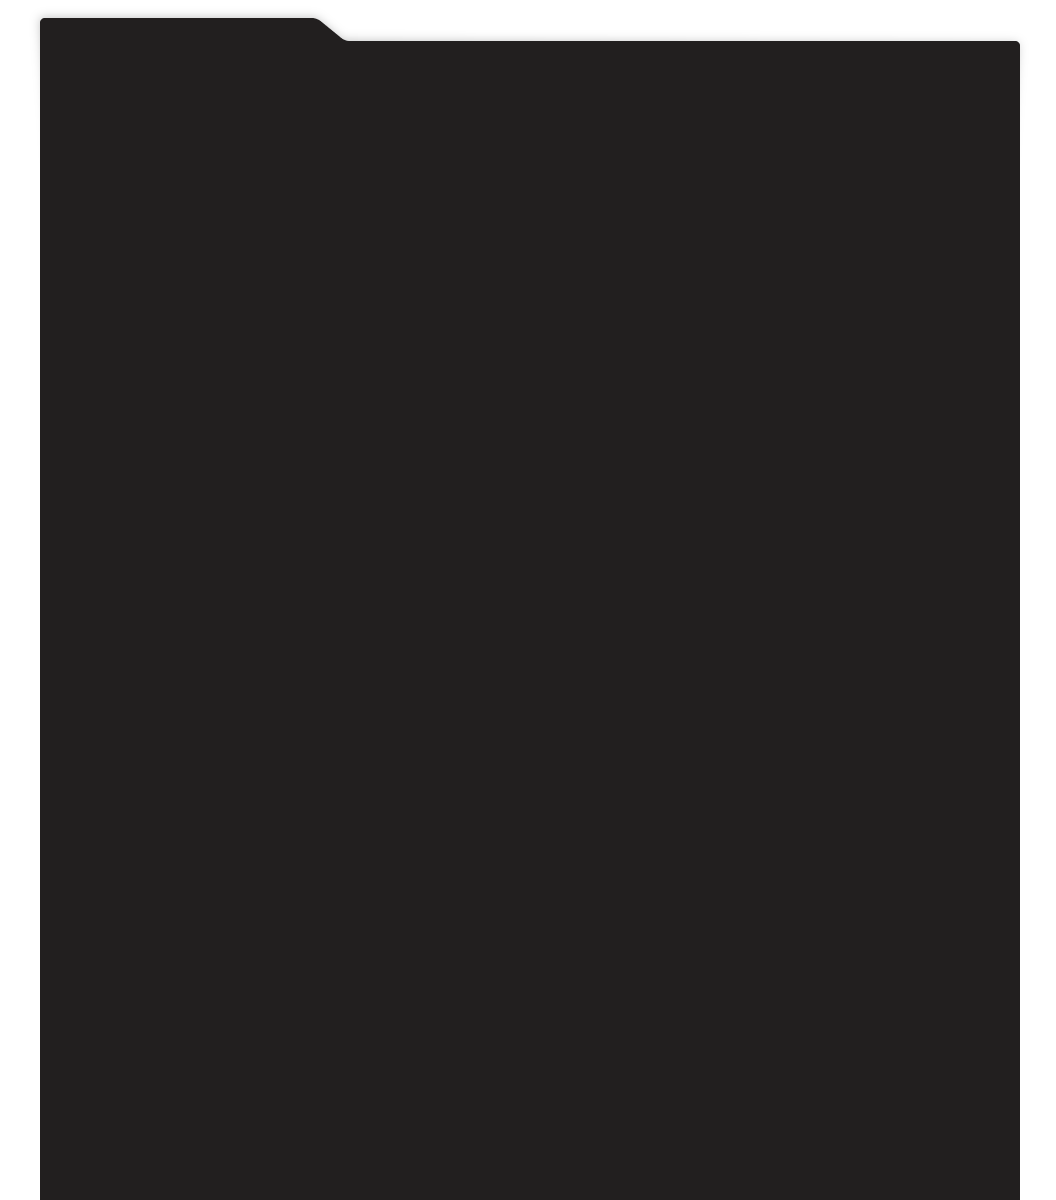
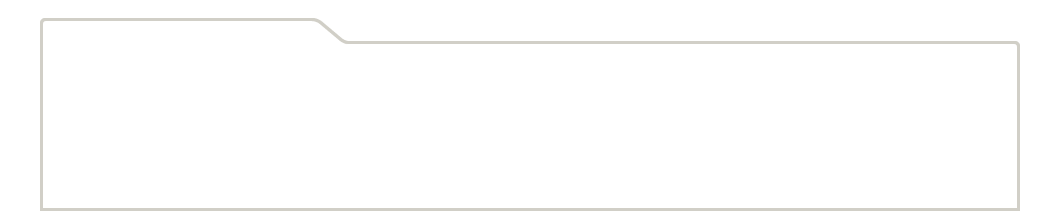
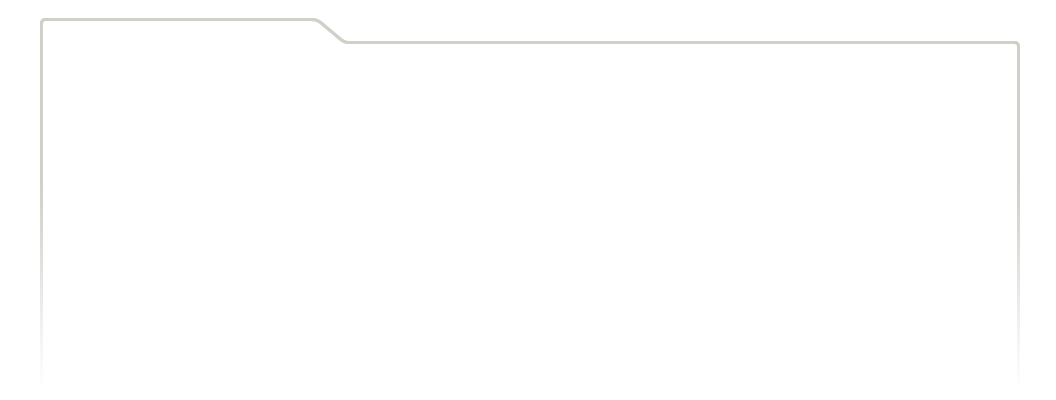
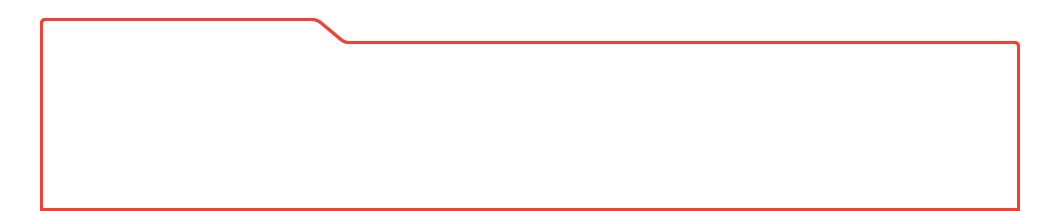
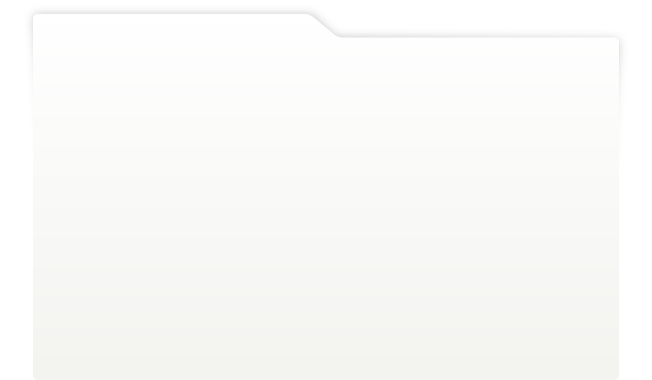
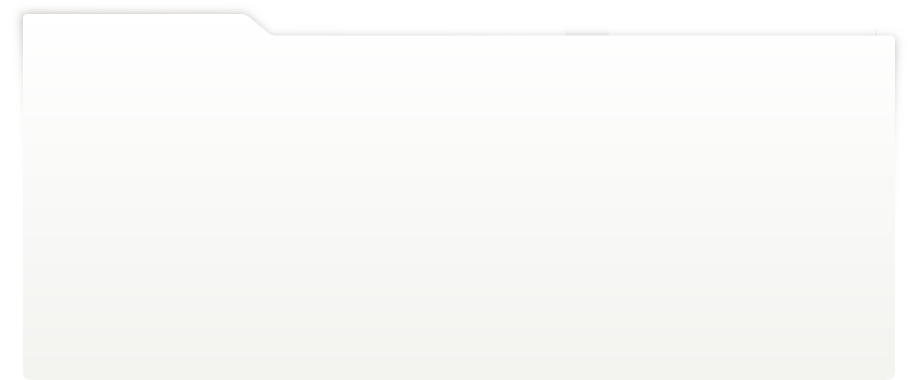
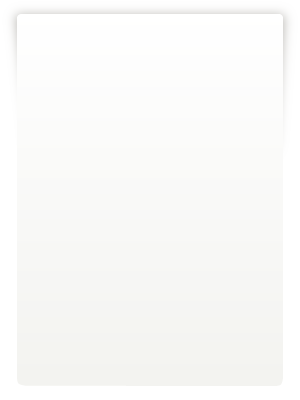
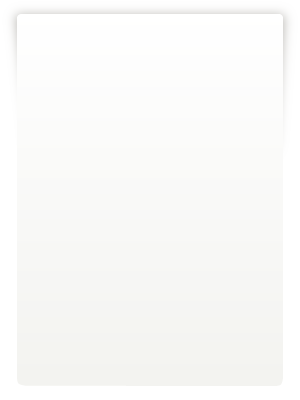
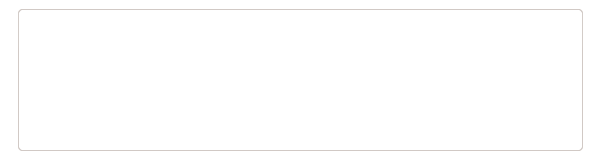
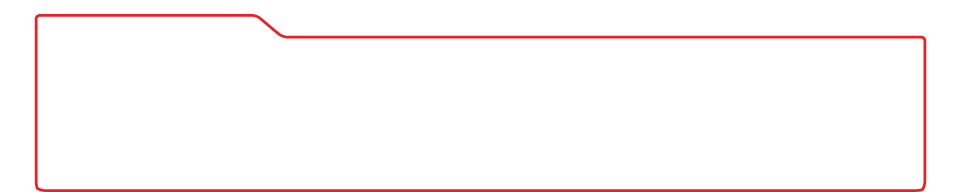
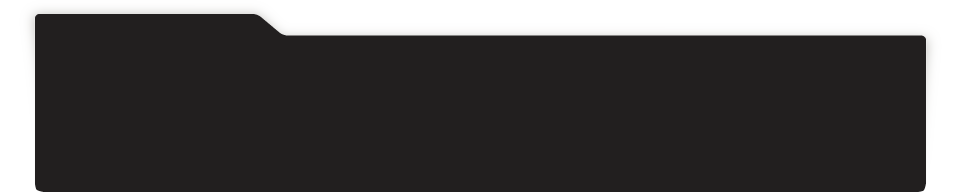
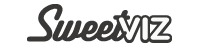
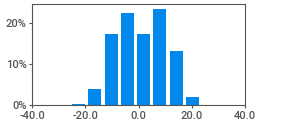
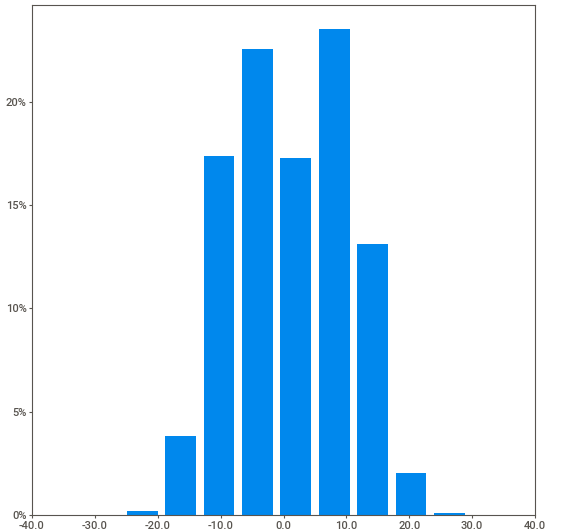
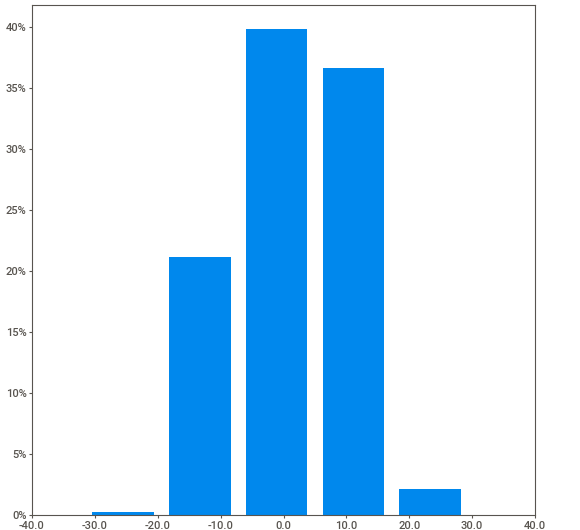
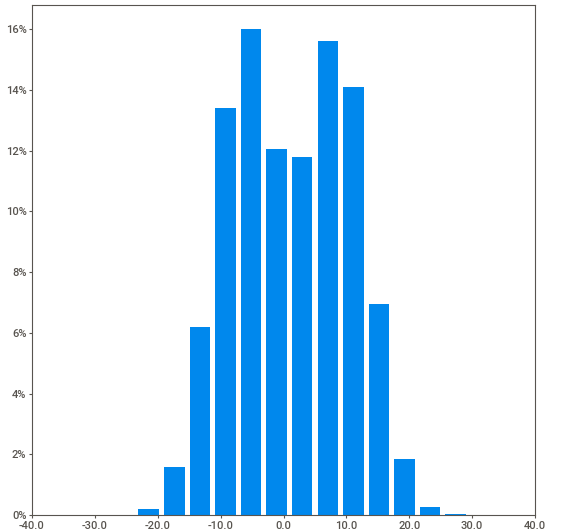
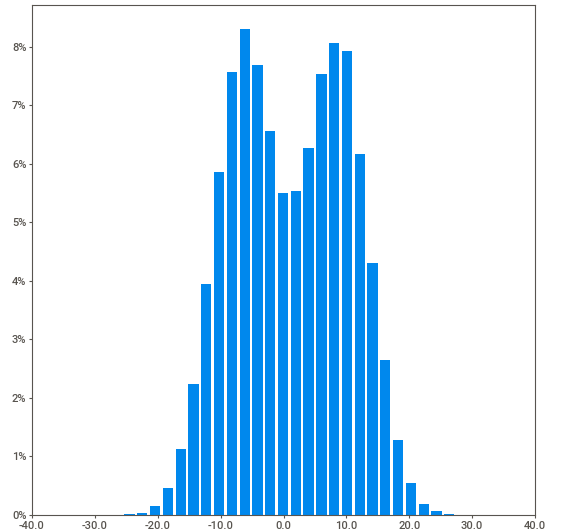
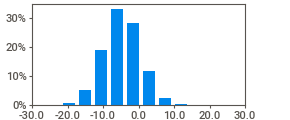
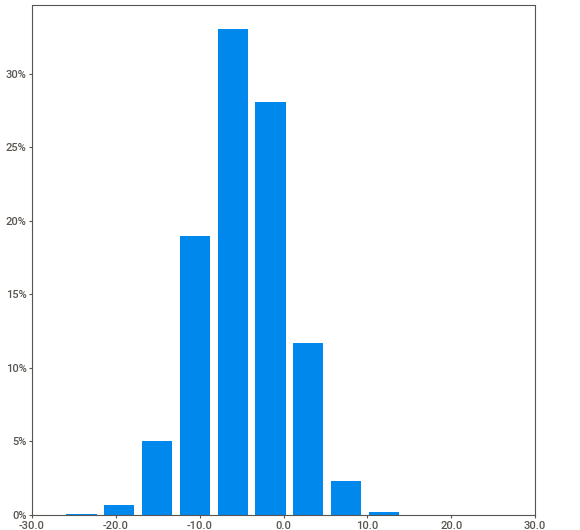
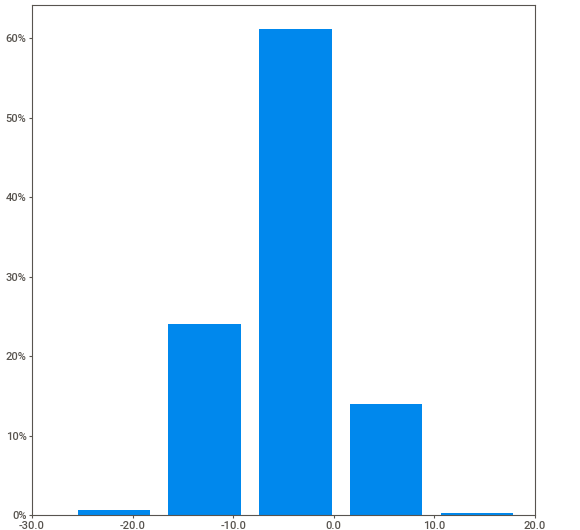
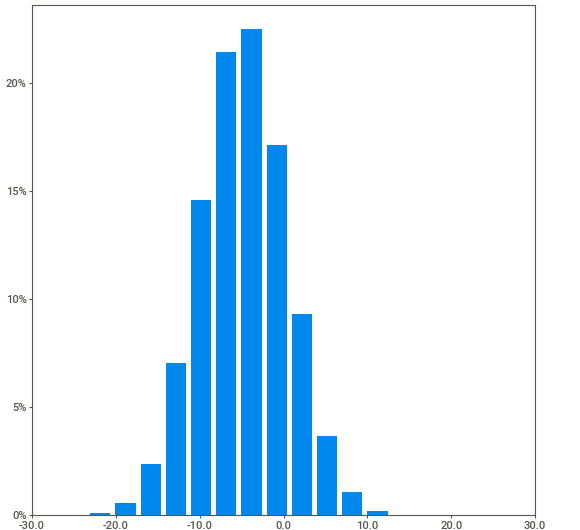
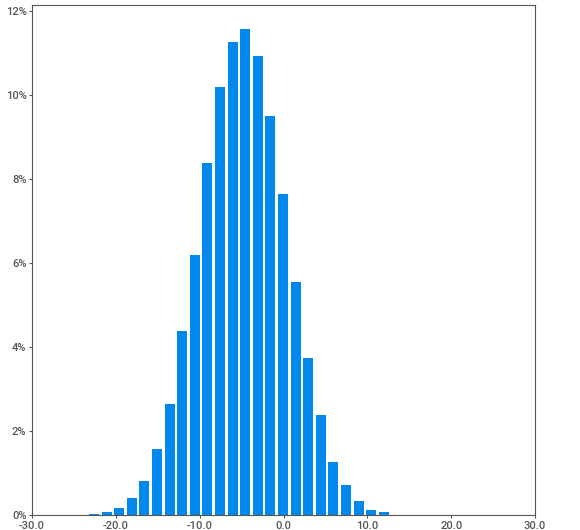
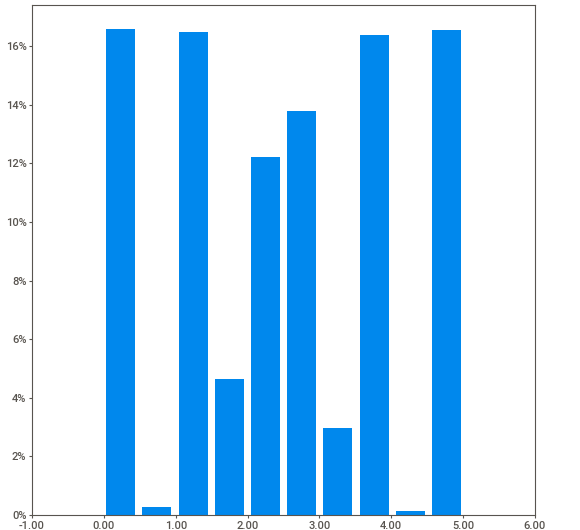
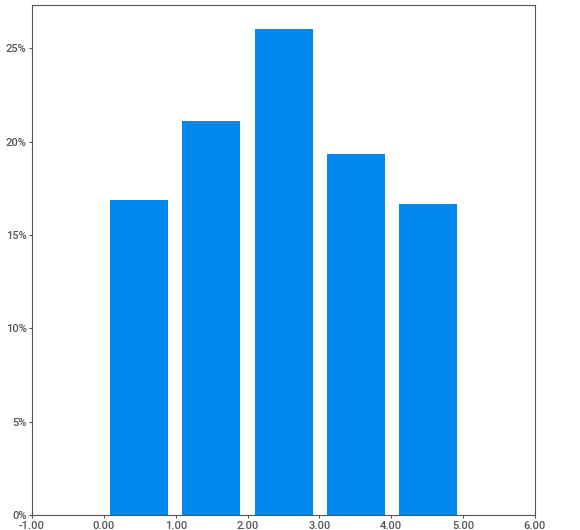
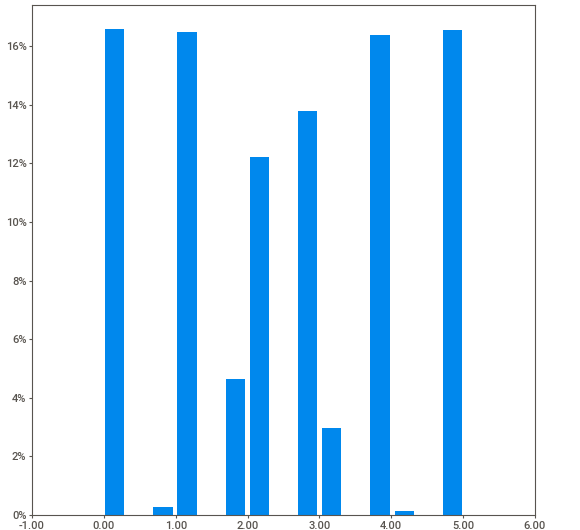
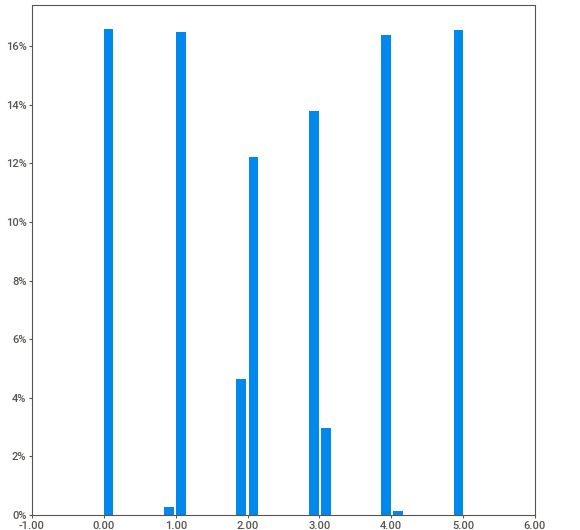
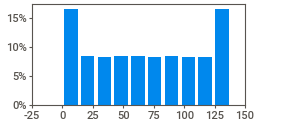
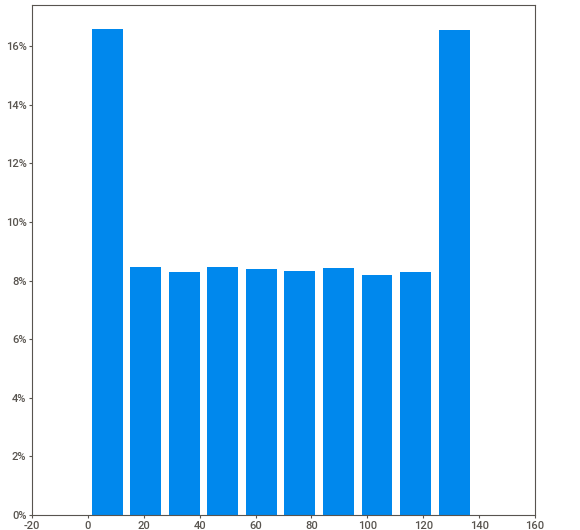
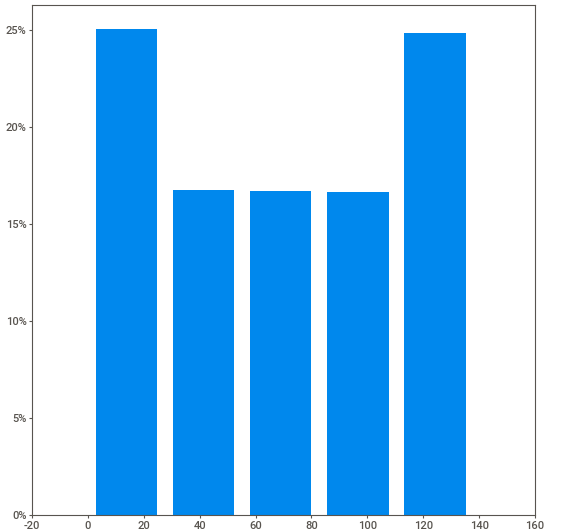
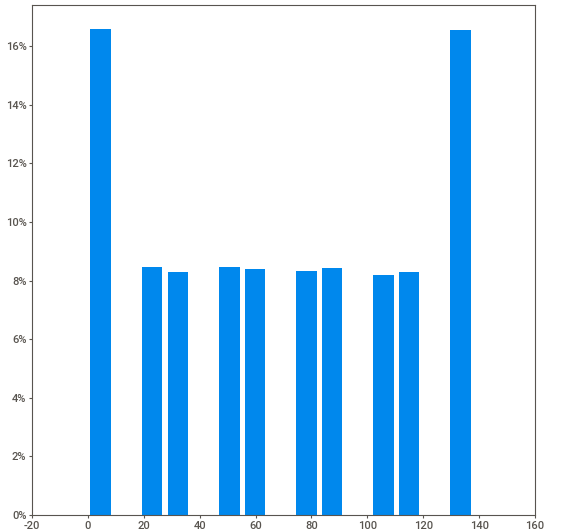
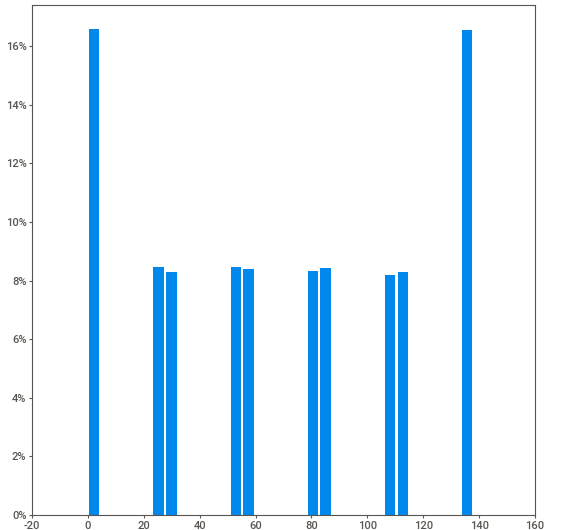
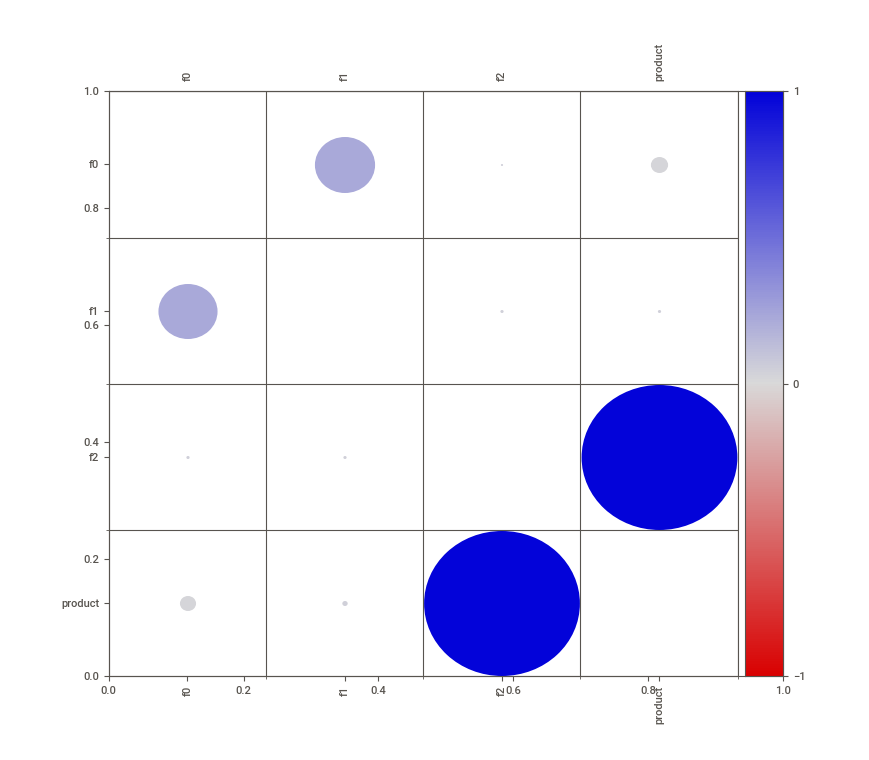
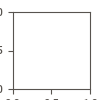

In [8]:
report1 = sv.analyze([data_1, "summary"])
report1.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


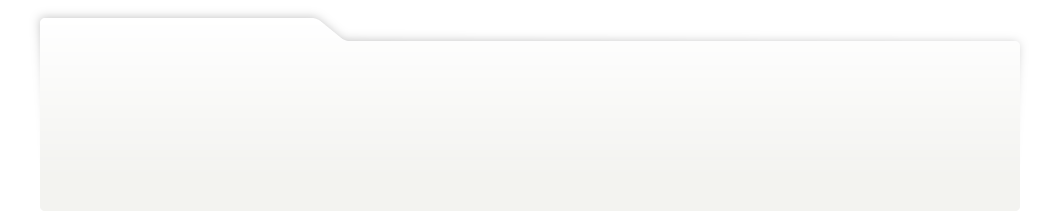
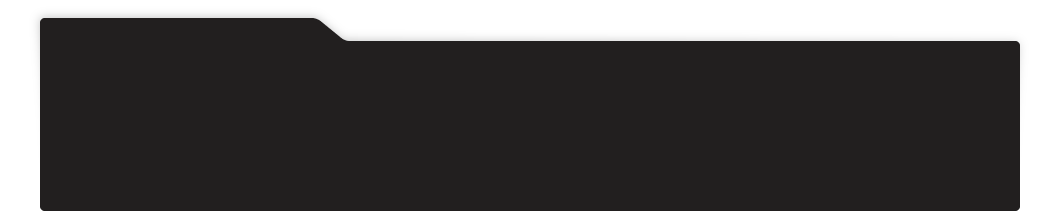
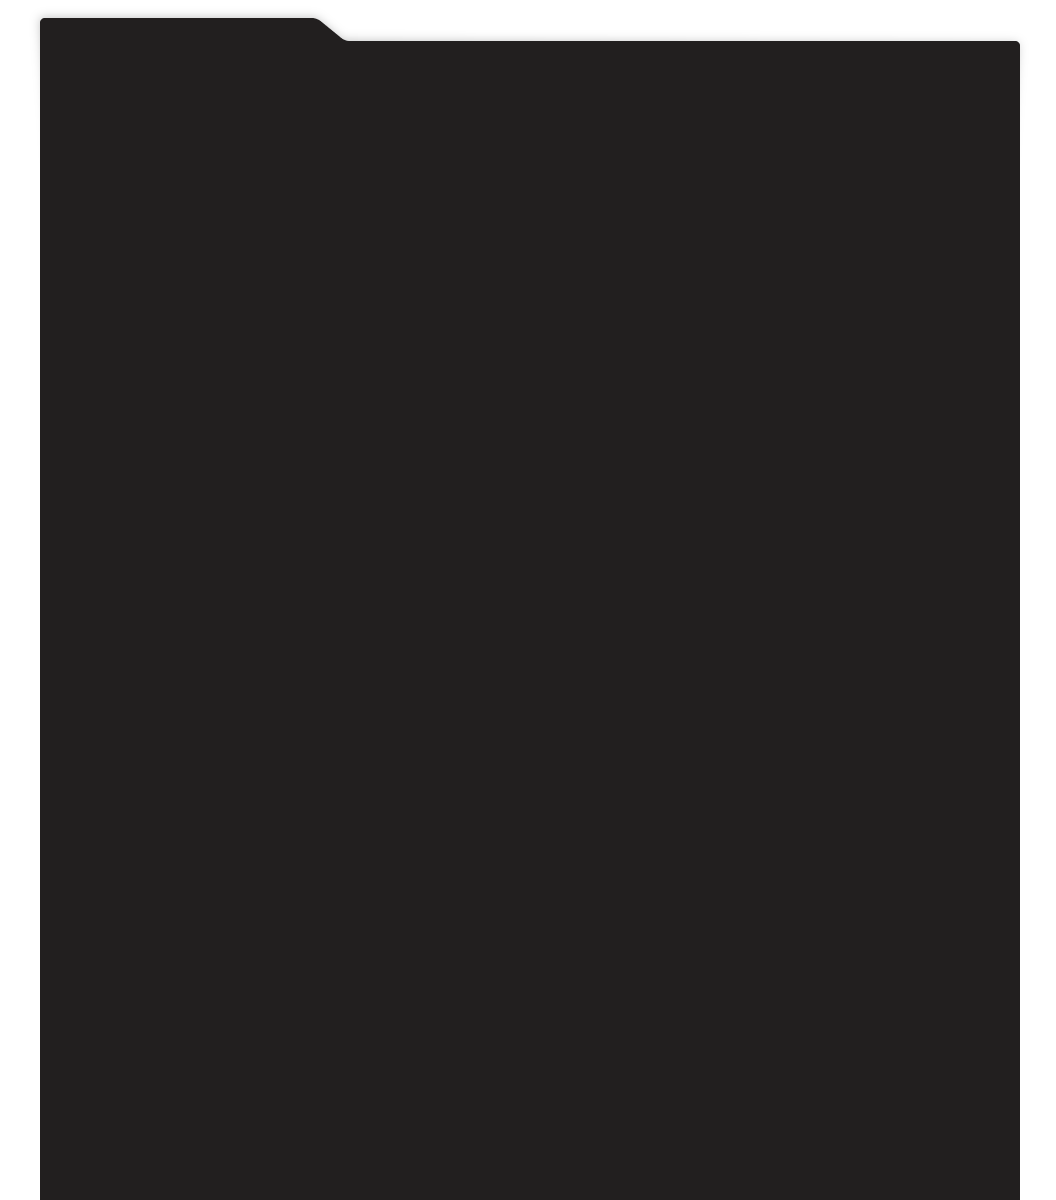
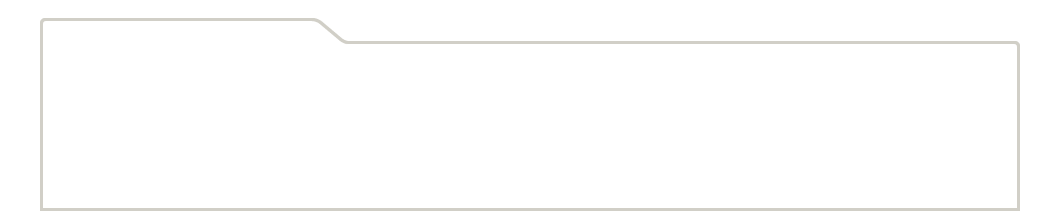
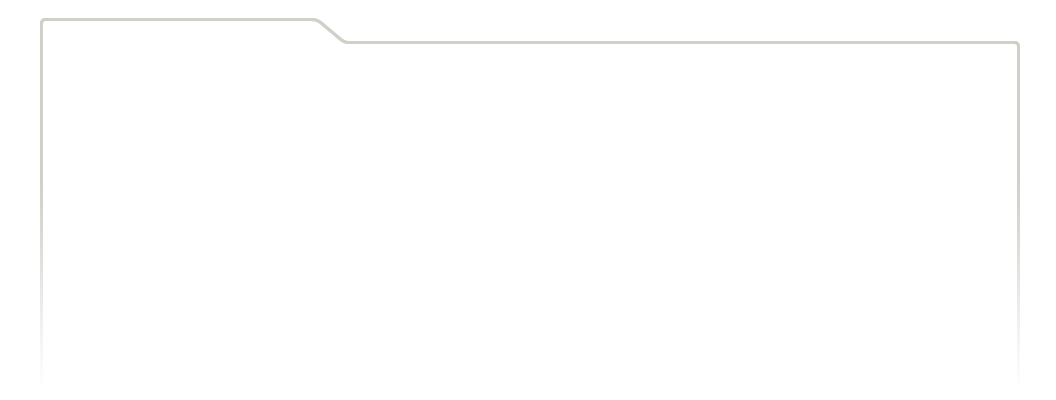
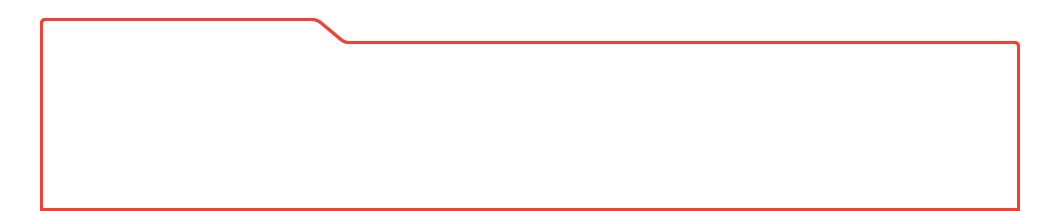
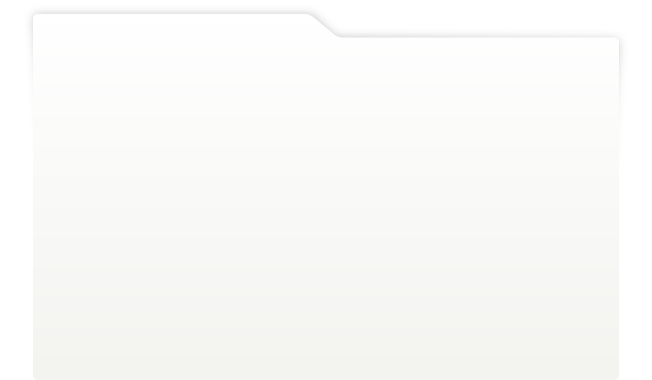
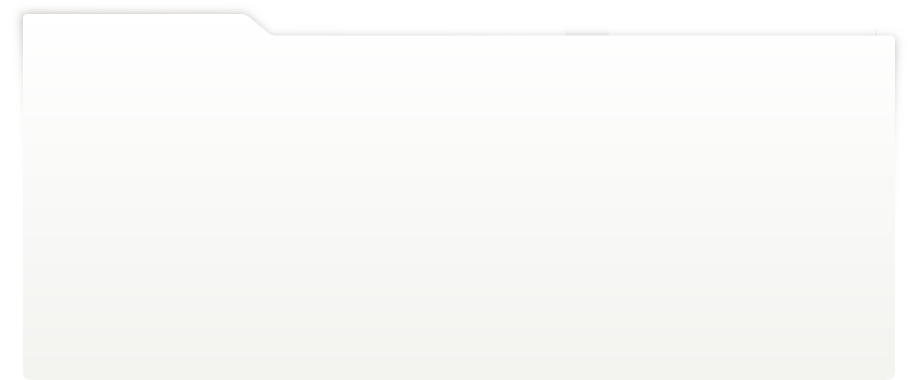
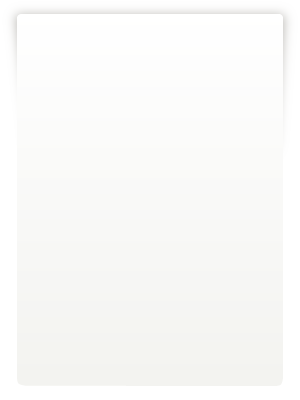
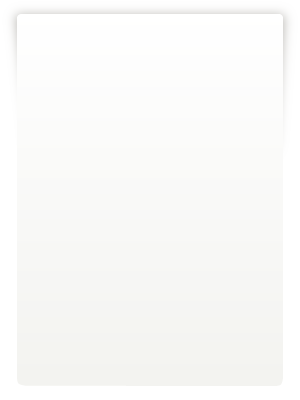
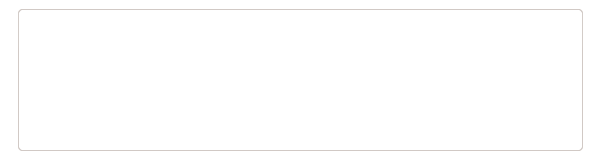
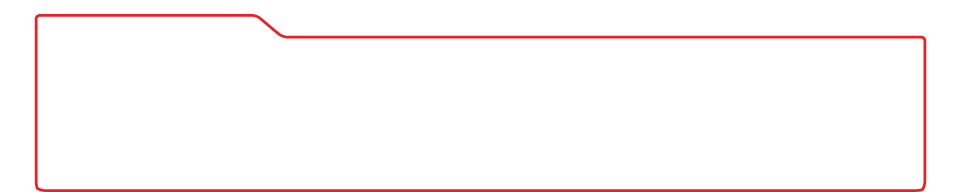
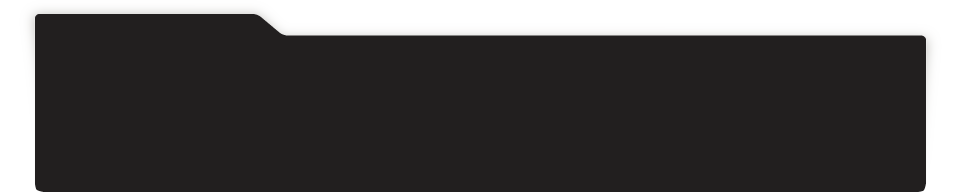
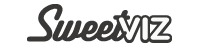
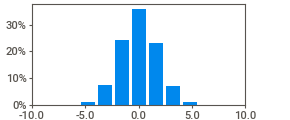
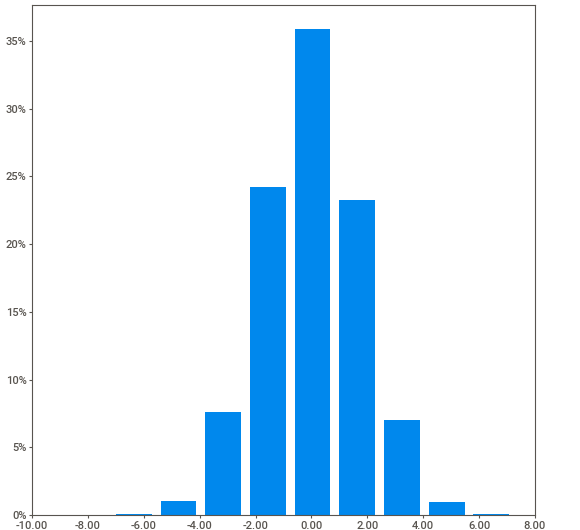
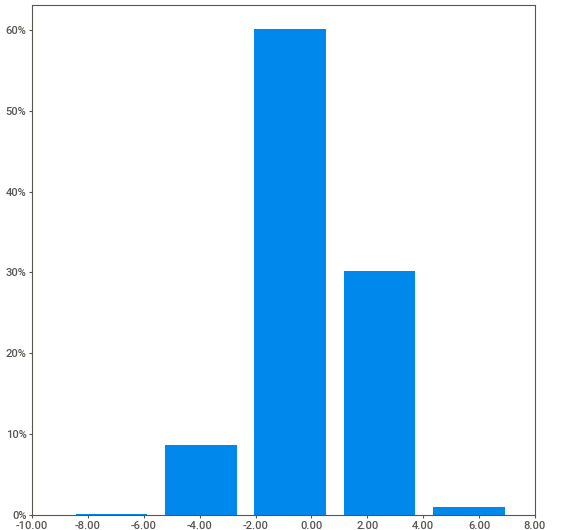
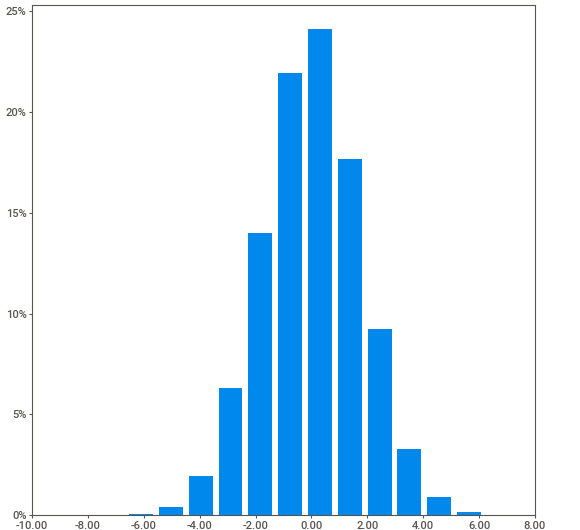
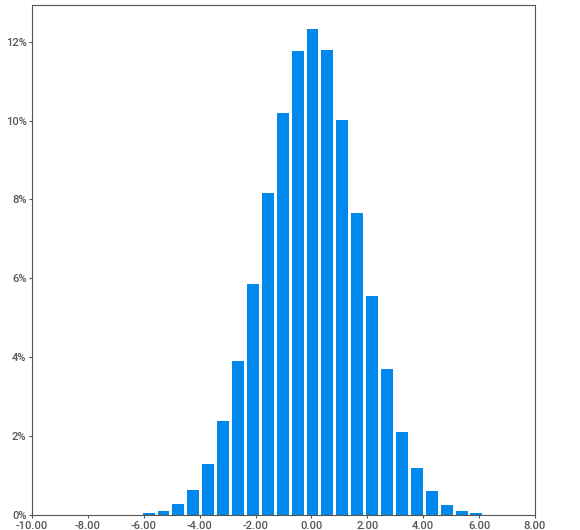
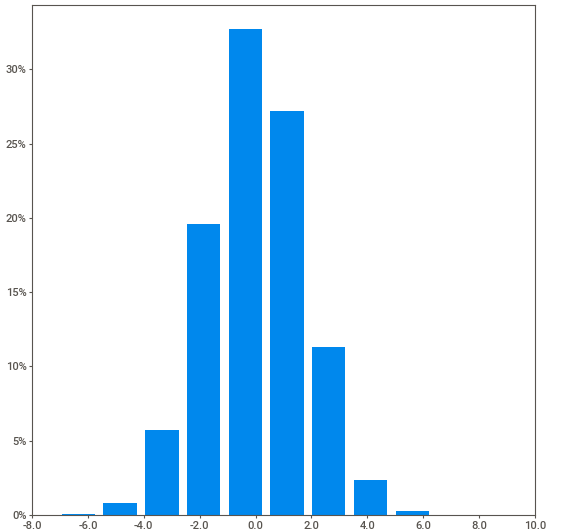
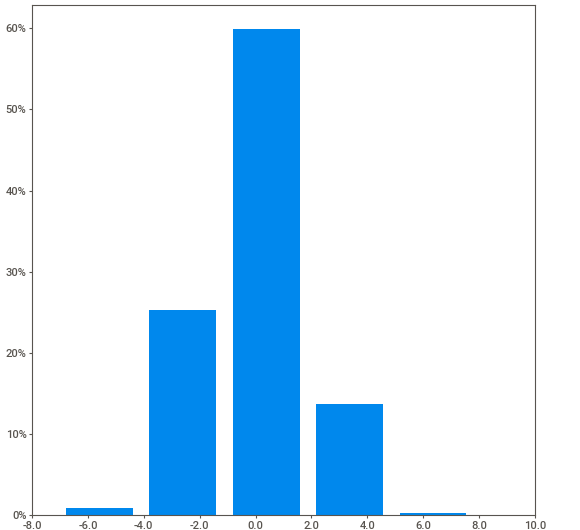
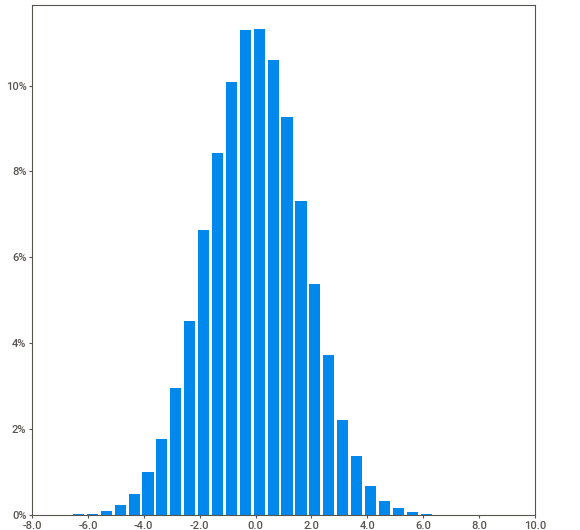
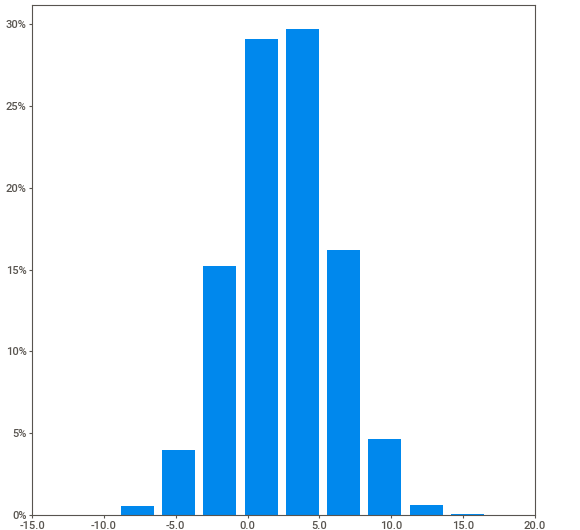
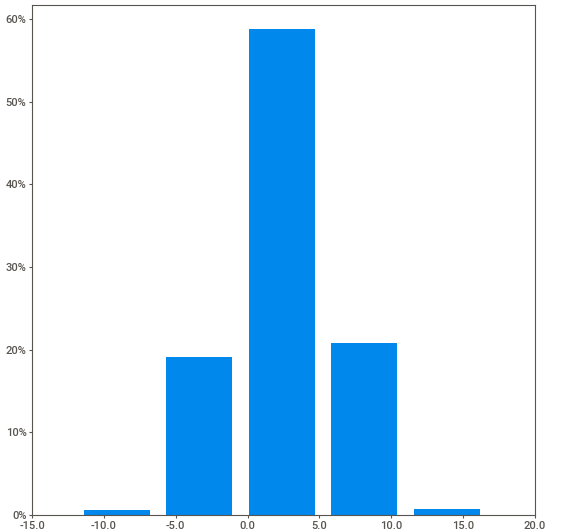
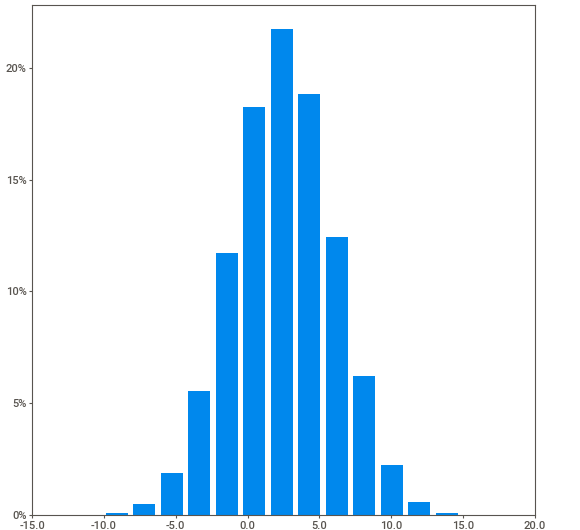
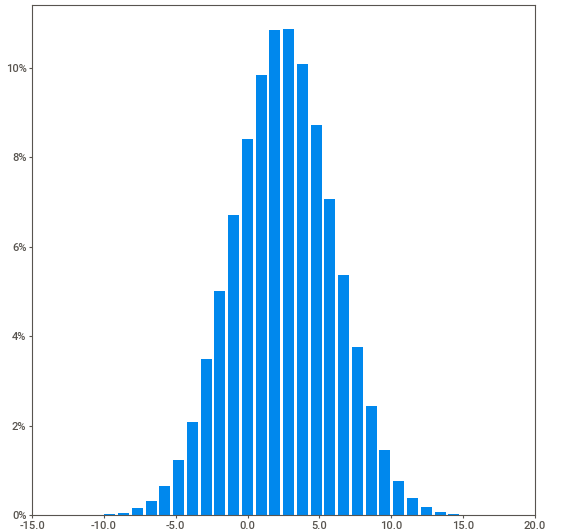
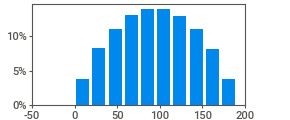
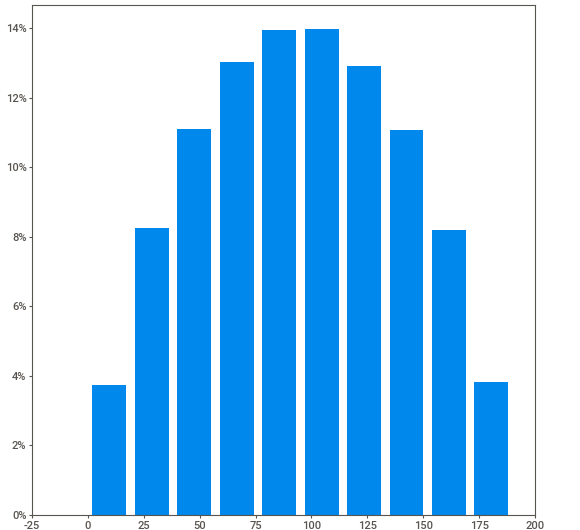
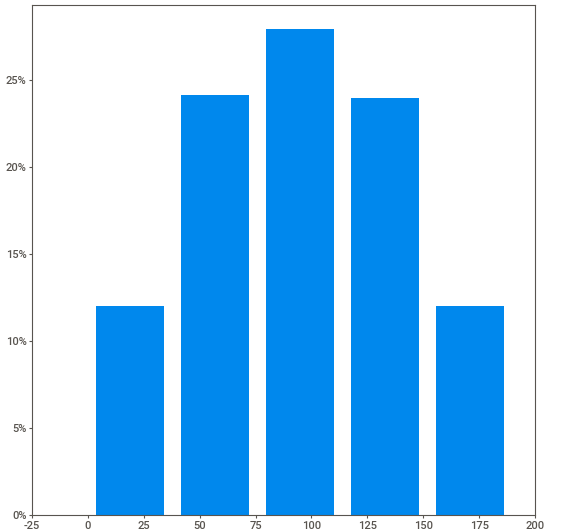
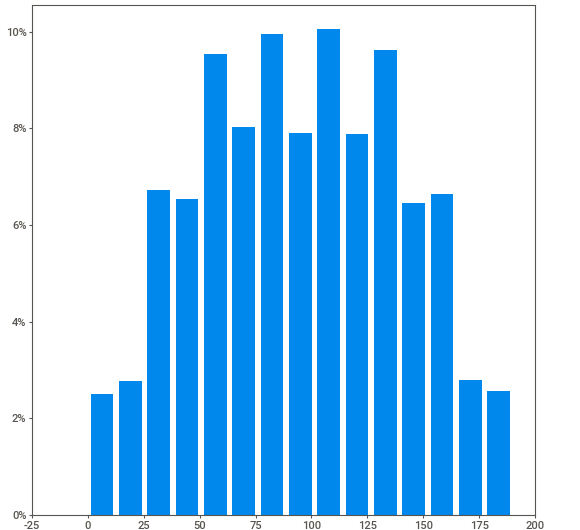
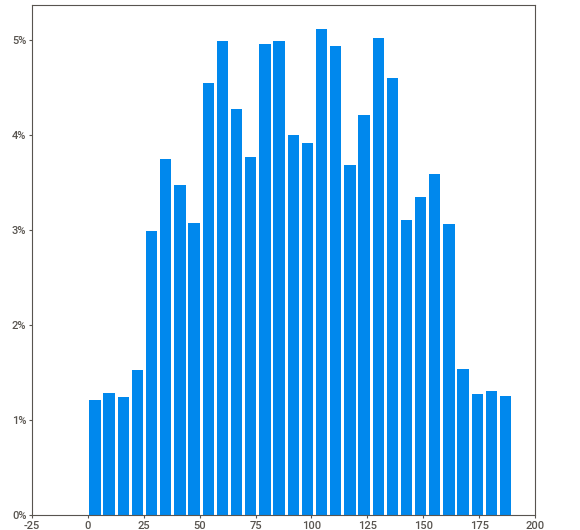
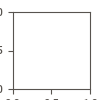

In [9]:
report2 = sv.analyze([data_2, "summary"])
report2.show_notebook()

анализ данных нам говорит мало о чем, сложно даже предположить что за признанаки там закодированы, однако f2 подозрительно сильно коррелирует с целевым признаком, особенно во втором датасете data_1, еслибы не два других датасета можно былобы предположить что это масштабированный целевой признак.

Судя по всему нам предоставили уже подготовленный набор данных для линейной регрессии

визуализируем кореляцию датасетов

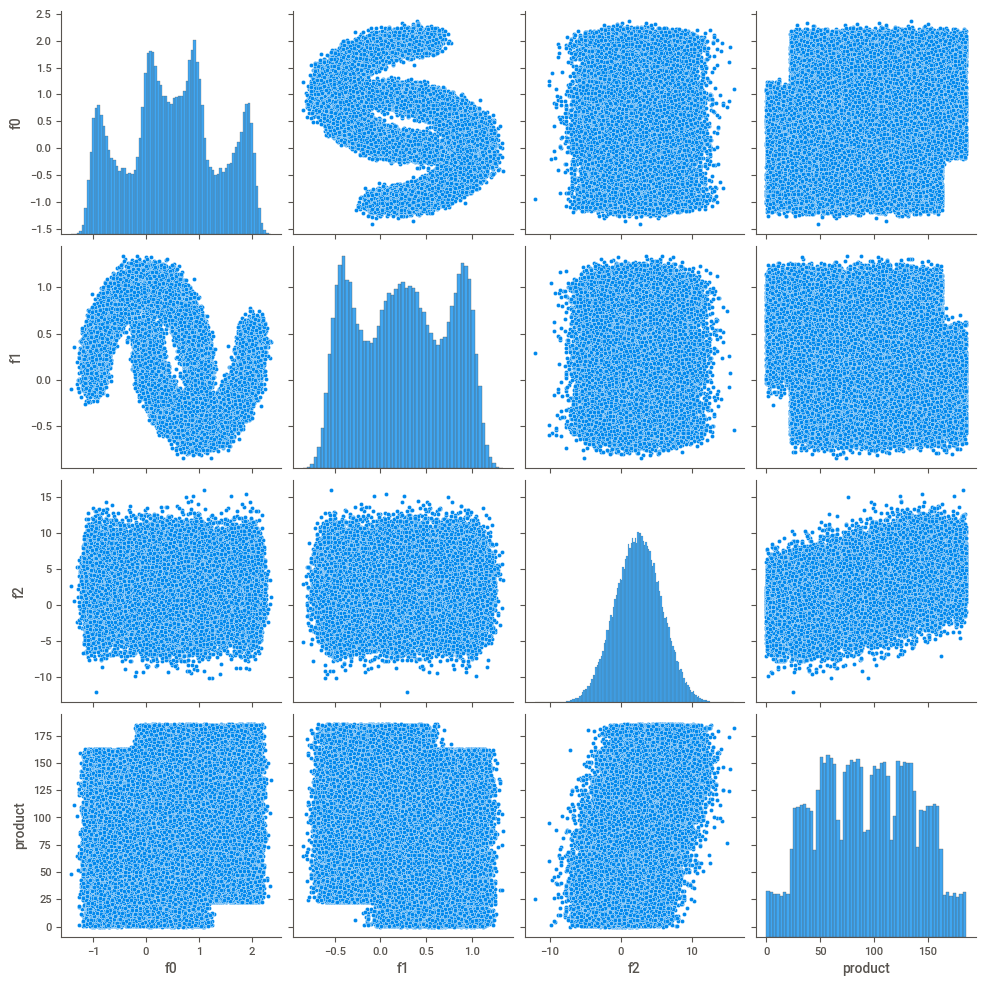

In [10]:
sns.pairplot(data_0)

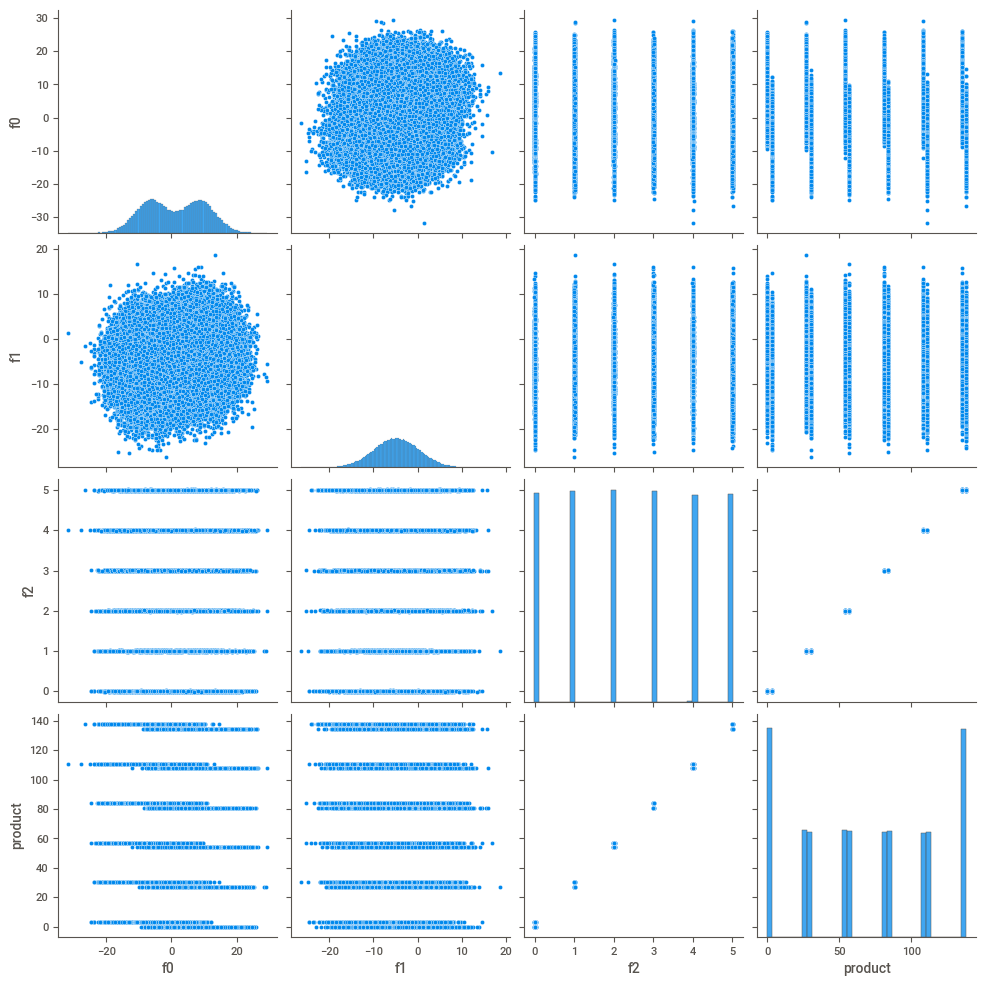

In [11]:
sns.pairplot(data_1)

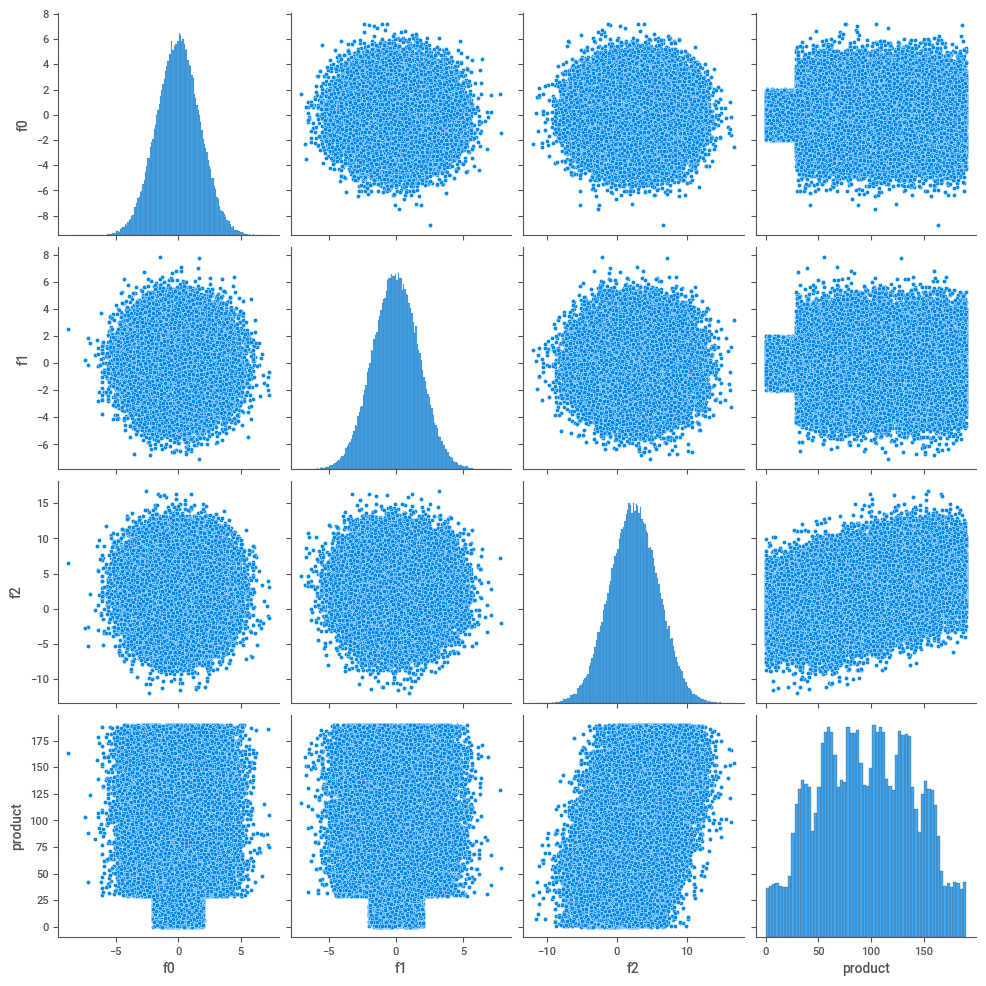

In [12]:
sns.pairplot(data_2)

Сразу бросается в глаза упорядоченность и сильная кореляция в data_1

### Деление на выборки

In [13]:
def prep_df_for_model(df):
    y = ['product']
    x_drop = ['product', 'id']
    target = df[y]
    features = df.drop(x_drop, axis=1)
    
    x_train, x_valid, y_train, y_valid = train_test_split(features, target, test_size=0.25, random_state=123)
    return x_train, x_valid, y_train, y_valid

In [14]:
for i in range(len(DATASETS)):
    exec(f"x_train_{i}, x_valid_{i}, y_train_{i}, y_valid_{i} = prep_df_for_model(data_{i}) \n")


In [15]:
scaler = StandardScaler()

In [16]:
for i in range(len(DATASETS)):
    exec(f"scaler.fit(x_train_{i}) \n"
         f"x_train_{i} = scaler.transform(x_train_{i})\n"
         f"scaler.fit(x_valid_{i})\n"
         f"x_valid_{i} = scaler.transform(x_valid_{i}) \n")

### Обучение и проверка модели

In [17]:
for i in range(len(DATASETS)):
    exec(f"model_{i} = LinearRegression() \n"
         f"print('регион из data_{i}')\n"
         f"print('score кроссвалидации на 5 фолдах:')\n"
         f"print(cross_val_score(model_{i}, x_train_{i}, y_train_{i}, cv=5)) \n"
         f"model_{i}.fit(x_train_{i}, y_train_{i}) \n"
         f"predictions_valid_{i} = model_{i}.predict(x_valid_{i}) \n"
         f"print('RMSE',mean_squared_error(y_valid_{i}, predictions_valid_{i})**0.5) \n"
         f"print('средний запас предсказанного сырья в одной скважине', predictions_valid_{i}.mean()) \n" 
         f"print()")

регион из data_0
score кроссвалидации на 5 фолдах:
[0.26456841 0.27779959 0.2702725  0.28332857 0.2722599 ]
RMSE 37.65044967583729
средний запас предсказанного сырья в одной скважине 92.38312536292185

регион из data_1
score кроссвалидации на 5 фолдах:
[0.99962381 0.99962379 0.9996302  0.99962719 0.99962729]
RMSE 1.089157654400054
средний запас предсказанного сырья в одной скважине 68.67542921307367

регион из data_2
score кроссвалидации на 5 фолдах:
[0.19308712 0.19989953 0.20429695 0.19792888 0.20738701]
RMSE 40.126351150036236
средний запас предсказанного сырья в одной скважине 95.042170604466



Предварительные выводы: Мы рассмотрели 3 региона и построили для них предсказательеные модели. Наивысшей точностью обладает модель для второго региона (data_1), но там в среднем на скважину на ~30% меньше сырья чем в двух других

### Подготовка к расчёту прибыли

In [18]:
INVEST = 10_000_000_000
INC_PER_ONE = 450_000
STATE = np.random.RandomState(12345)
COUNT_OILWELL = 200


In [19]:
roi_null = INVEST / INC_PER_ONE
print(roi_null)

22222.222222222223


~22222 тысячи баррелей сырья необходимо добыть из региона для окупаемости инвестиций (10млрд)

In [20]:
print(INVEST / INC_PER_ONE / COUNT_OILWELL)

111.11111111111111


из условий задачи что в разработке будет 200 скважин, для точки безубыточности минимальное среднее количество продукта в месторождениях региона, достаточное для разработки примерно равно 111 баррелей на скважину

из подсчета мы видим что среднее количество сырья на **случайную** скважину меньше необходимой точки безубыточности, если мы будем выбирать 200 скважин случайно - мы будем нести убытки


* первый регион ~92.38 тысяч баррелей из 111.11 тысяч баррелей в среднем на скважину необходимых для безубыточности
* второй регион ~68.67 тысячах баррелейиз 111.11 тысяч баррелей в среднем на скважину необходимых для безубыточности
* третий регион ~95 из тысячах баррелей 111.11 тысяч баррелей в среднем на скважину необходимых для безубыточности

функция подсчета необходимого количества (в данном случае 200) наилучших предсказанных значений для бутстрапа

In [21]:
def sum_best_of_count(target, predicted, count):

    pred_sorted = predicted.sort_values(ascending=False)
    selected = target[pred_sorted.index].iloc[:count]
    sum_best = sum(selected)
    return sum_best

подготовим переменные для работы, переведем в формат series

In [22]:
for i in range(len(DATASETS)):
    exec(f"var = list(predictions_valid_{i})\n"
         f"predictions_valid_{i}_ser = pd.Series(var) \n"
         f"target_valid_{i}_new_index = y_valid_{i}.reset_index(drop=True) \n"
         f"target_valid_{i}_new_index_ser = pd.Series(target_valid_{i}_new_index['product']) \n")

### Расчёт прибыли и рисков 

бутстрап из 1000 итераций; берем 500 случайных значений из списка предикта, выбираем из них 200 лучших; формируем список лучших, смотрим на 95% доверительный интервал (для того чтобы найти наихудший расклад соответствующий 0.025 процентилю), а так же среднее

In [23]:
def bootstrap_200_500(predict_series, target_series):
    values = []
    revenue = []
    for i in range(1000):
        pred_ = predict_series.sample(500, replace=True, random_state=STATE)
        target_ = target_series[pred_.index]
        summ_prod_best_200 = sum_best_of_count(target_ , pred_, COUNT_OILWELL)
        values.append(summ_prod_best_200)
        revenue.append(summ_prod_best_200 * INC_PER_ONE)

    return values, revenue

In [24]:
def profit(revenue):
    return (revenue - INVEST)
    

In [25]:
def risk_perc_profit(profit):
    risk_loss = 0
    for i in range(15000,0,-1):
        loss_thrhld = profit.quantile(i/100000)
        if loss_thrhld < 0:
            risk_loss = i/100000
            break
    print(f'риск убытков равен {risk_loss*100}%')

In [26]:
for i in range(len(DATASETS)):
    exec(f"values_{i}, revenue_{i} = bootstrap_200_500(predictions_valid_{i}_ser, target_valid_{i}_new_index_ser) \n")

In [27]:
for i in range(len(DATASETS)):
    exec(f"values_{i} = pd.Series(values_{i}) \n"
        f"revenue_{i} = pd.Series(revenue_{i}) \n"
         f"profit_{i} = profit(revenue_{i}) \n"
         
        f"lower_p{i} = profit_{i}.quantile(0.025) \n"
        f"higher_p{i} = profit_{i}.quantile(0.975) \n"
        f"mean_p{i} = profit_{i}.mean() \n"
         

       f"print('регион из датасета data_{i}') \n"
        f"print('прибыль, в среднем', mean_p{i}) \n"
        
         
         f"print('прибыль, верхняя граница 95% доверительного интервала', higher_p{i}) \n"
         f"print('прибыль, нижняя граница 95% доверительного интервала',lower_p{i}) \n"
         f"risk_perc_profit(profit_{i}) \n"
         
        f"print() \n")

регион из датасета data_0
прибыль, в среднем 505324400.130134
прибыль, верхняя граница 95% доверительного интервала 1062107249.3602622
прибыль, нижняя граница 95% доверительного интервала -1086050.099343631
риск убытков равен 2.551%

регион из датасета data_1
прибыль, в среднем 534110250.3778872
прибыль, верхняя граница 95% доверительного интервала 960055329.785417
прибыль, нижняя граница 95% доверительного интервала 113674210.19242197
риск убытков равен 0.158%

регион из датасета data_2
прибыль, в среднем 370686652.8945897
прибыль, верхняя граница 95% доверительного интервала 900759974.7676752
прибыль, нижняя граница 95% доверительного интервала -189180980.95072135
риск убытков равен 9.997%



### Выводы

В данном исследовании мы оценили 3 датасета о месторождениях нефти в 3х разных регионах. Мы провели предварительный анализ, предобработку, разделили датасет на обучающую и валидационную выборки в соотношении 3к1. затем обучили модели линейной регресии и на основе предсказаний вычислили для каждого реиона вероятность понести убытки, среднюю выручку и 95% доверительный интервал. Условиям задачи (вероятность убытков менее 2.5%) соответствовал только второй регион (data_1). Для него мы посчитали интересующие показатели, прибыль (534 млн) и шанс понести убытки при заданных вводных всего (0.158%)


**Для разработки лучше всего подойдет второй регион (data_1). он обладает сразу несколькими важными плюсами:**
* **наша модель обладает очень высокой предсказательной способностью именно на нем, и можно ожидать довольно близкие к реальности прогнозы**
* **после того как мы (согласно условиям задачи) возмем 500 случайных точек и выберем из них 200 наилучших, вероятность понести убытки будет равна всего 0.158%, что в ~16 раз ниже минимально приемлимой при условиям**
* **ожидаемая средняя прибыль составит 526.5 миллионов рублей, c ROI 5.34%**